In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [3]:
X=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
lr.coef_

array([ -31.80406415, -214.66452697,  445.14791885,  376.34786891,
       -802.50380919,  525.99207358,  106.4287134 ,  172.3171033 ,
        799.50335529,   57.1646797 ])

In [11]:
lr.intercept_

152.6275795791894

In [12]:
y_pred=lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5012577617513011

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

54.034950681329846

In [67]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)

In [68]:
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [69]:
r.coef_

array([ -31.82685562, -214.52268694,  445.27917287,  376.24158688,
       -789.60048094,  515.82035313,  100.74867619,  170.674682  ,
        794.72643063,   57.21751638])

In [70]:
r.intercept_

152.6271551129153

In [71]:
y_pred=r.predict(X_test)

In [72]:
r2_score(y_pred,y_test)

0.053798385520713365

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

54.03448842947645

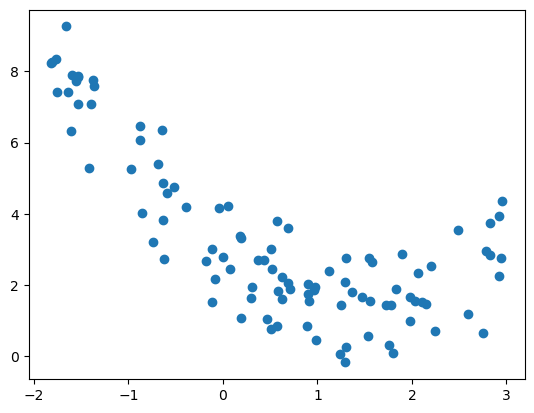

In [74]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

Alpha = 0, R² score = 0.8536
Alpha = 20, R² score = 0.8221
Alpha = 200, R² score = 0.7534


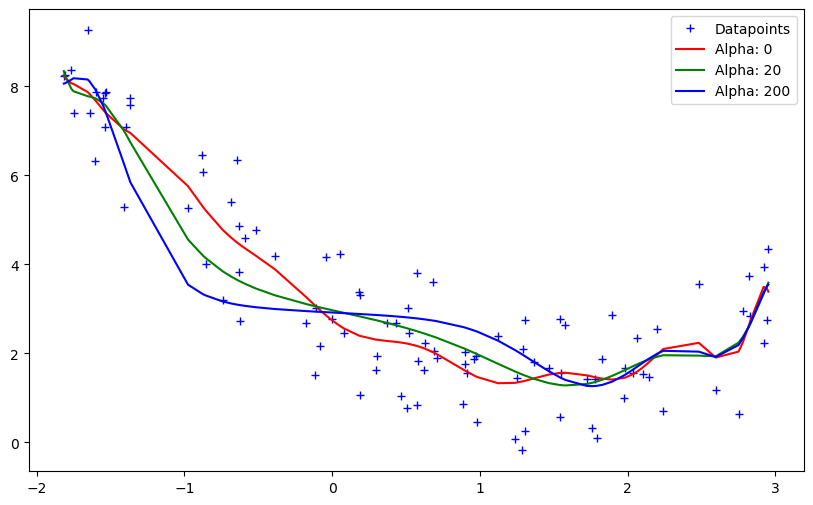

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    r2 = r2_score(x2, preds)
    print(f"Alpha = {alpha}, R² score = {r2:.4f}")
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [81]:
#the model works best without regularization, 
#including lambda does reduced improvement but the method makes the process easy.